In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt


path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## Question 3: Was there a salary increase between 2023 and this year?

### Tabla 1 - Encontrar si hubo un incremento salarial entre 2023 y 2024

In [2]:
# Formatting numbers in column 'salary_in_usd' as currency.
# salaries_df['salary_in_usd'] = salaries_df['salary_in_usd'].map('${:,.2f}'.format)
# salaries_df.head()

In [3]:
# Created a new data frame that only includes columns 'work_year' and 'salary_in_usd'
yearandsalary_df = salaries_df[['work_year', 'salary_in_usd']]
yearandsalary_df.head()

,work_year,salary_in_usd
0,2021,40038
1,2021,36259
2,2020,35735
3,2021,77364
4,2022,95386


In [4]:
# Created a new data frame that only includes 2023 in column 'work_year'
only2023salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2024])].index)
only2023salary_df.head()

,work_year,salary_in_usd
10,2023,60805
11,2023,60207
16,2023,48644
19,2023,43779
21,2023,38915


In [5]:
# Created a new data frame that only includes 2024 in column 'work_year'
only2024salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2023])].index)
only2024salary_df.head()

,work_year,salary_in_usd
20,2024,39615
33,2024,27611
66,2024,800000
68,2024,774000
69,2024,750000


In [6]:
# Calculate the average salary in 2023
average2023salary = only2023salary_df[only2023salary_df['work_year'] == 2023]['salary_in_usd'].mean()
print(f'The average salary in 2023 was ${average2023salary:.2f}')

The average salary in 2023 was $153732.66


In [7]:
# Calculate the average salary in 2024
average2024salary = only2024salary_df[only2024salary_df['work_year'] == 2024]['salary_in_usd'].mean()
print(f'The average salary in 2024 was ${average2024salary:.2f}')

The average salary in 2024 was $151510.09


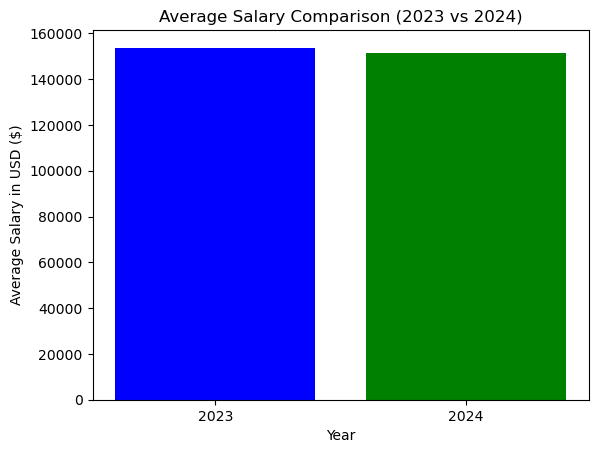

In [8]:
# Creating a bar plot

years = ['2023', '2024']
averages = [average2023salary, average2024salary]

plt.bar(years,averages, color=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Average Salary in USD ($)')
plt.title('Average Salary Comparison (2023 vs 2024)')
plt.savefig('Figures/EugenioFig1.png', bbox_inches='tight')
plt.show()

##### Analysis of Question 3

In order to find if there was a salary increment between 2023 and 2024, we first created a new dataframe that isolated the information that we really needed for this question which was work year and salary in usd. This new dataframe included every year from the data set, so in order to only filter the years 2023 and 2024, we created 2 new dataframes, one for each year. From these new dataframes, we calculated the average salary in usd from each year. Finally we proceeded to create a bar plot to represent and compare both average salaries.

With the results, we concluded that the average salaries don't vary that much. There is a slight decrement going into 2024 in the average salary.

### Tabla 2 - Encontrar si hubo un incremento salarial por país entre 2023 y 2024

In [9]:
# Creating a new Data Frame for 2023 with only 3 columns: 'work_year', 'salary_in_usd' and 'employee_residence'
salary_per_country2023_df = salaries_df[['work_year', 'salary_in_usd', 'employee_residence']]
salary_per_country2023_df = salary_per_country2023_df[salary_per_country2023_df['work_year'] == 2023]

# Calculating the average salary per country in 2023
avgsalarybycountry_2023 = salary_per_country2023_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
avgsalarybycountry_2023.head()

,employee_residence,salary_in_usd
0,AD,50745.000000
1,AM,33500.000000
2,AR,58333.333333
3,AT,60462.000000
4,AU,163288.823529


In [10]:
# Creating a new Data Frame for 2024 with only 3 columns: 'work_year', 'salary_in_usd' and 'employee_residence'
salary_per_country2024_df = salaries_df[['work_year', 'salary_in_usd', 'employee_residence']]
salary_per_country2024_df = salary_per_country2024_df[salary_per_country2024_df['work_year'] == 2024]

# Calculating the average salary per country in 2023
avgsalarybycountry_2024 = salary_per_country2024_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
avgsalarybycountry_2024.head()

,employee_residence,salary_in_usd
0,AE,65000.000000
1,AR,88500.000000
2,AT,64166.000000
3,AU,133389.565217
4,BA,30000.000000


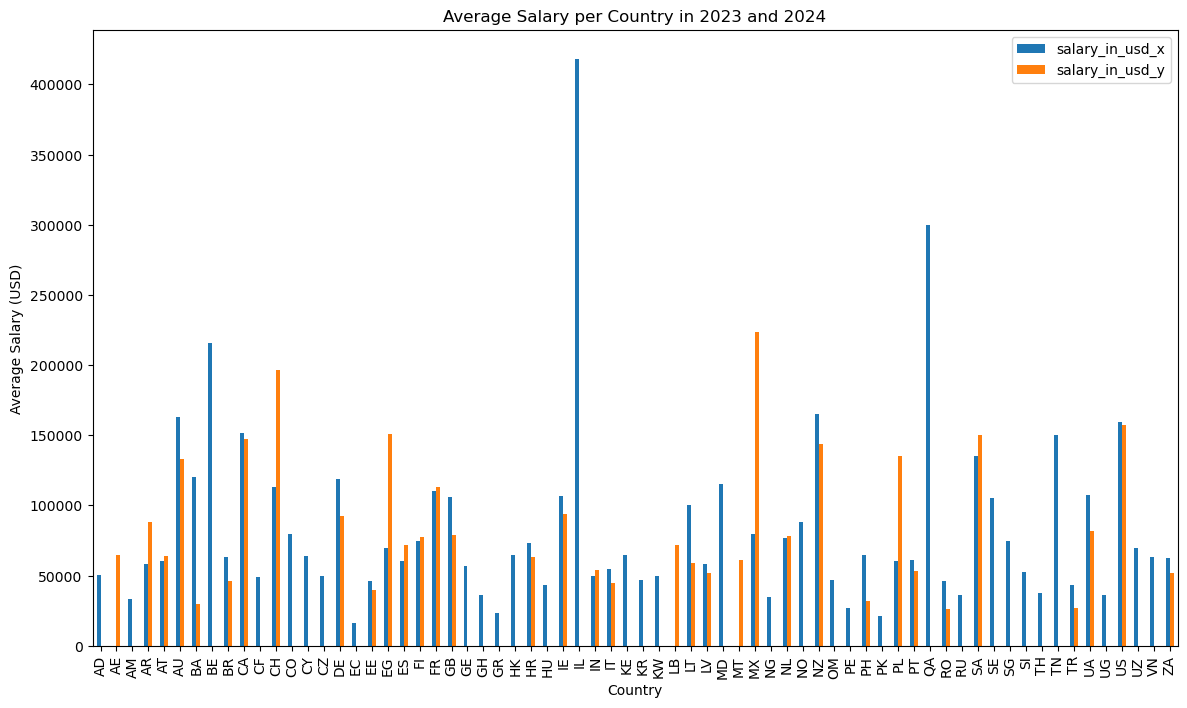

In [18]:
# Merging the 2023 and 2024 Data Frames on 'employee_residence' to create a combined Data Frame
combined_avg_salaries_df = pd.merge(avgsalarybycountry_2023, avgsalarybycountry_2024, on='employee_residence', how='outer')

# Setting the index to 'employee_residence'
combined_avg_salaries_df.set_index('employee_residence', inplace=True)

# Plotting the Data
combined_avg_salaries_df.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary per Country in 2023 and 2024')
plt.xticks(rotation=90)
plt.savefig('Figures/EugenioFig2.png', bbox_inches='tight')

plt.show()

In this next graph, we wanted to dive deeper into the salaries, especifically by country. Here, we found which countries had an increment or decrement in their average salaries from 2023 to 2024. To do this, we had to use the variables of employee residence and salary in usd. We created 2 new dataframes, one for each year. This new dataframes had a list of every country present in the database, along with the average salary corresponding to that country. The next step was to merge the dataframes and create a new combined dataframe, that listed every country present in the 2023 and 2024 dataframes, along with their average salaries. Finally, we created a bar plot that showed every country and their respective average salary in 2023 and 2024.

With this in mind, we were able to find that of the 68 countries present, 12 had a salary increment, 19 had a decrement and 37 other countries did not have presence in the dataset in both years.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question 6: Is there a relationship between company size and country of origin?

In [12]:
# Group the data by company location and company size, and count the number of companies
groupedcountries_data = salaries_df.groupby(['company_location', 'company_size']).size().unstack(fill_value=0)
groupedcountries_data

company_size,L,M,S
company_location,,,
AD,0,0,1
AE,3,0,2
AM,0,0,1
AR,1,6,0
AS,1,1,1
...,...,...,...
TR,2,2,2
UA,0,9,1
US,723,12185,67


In [13]:
# Calculate the total number of companies in each country
groupedcountries_data['total_companies'] = groupedcountries_data.sum(axis=1)
groupedcountries_data

company_size,L,M,S,total_companies
company_location,,,,
AD,0,0,1,1
AE,3,0,2,5
AM,0,0,1,1
AR,1,6,0,7
AS,1,1,1,3
...,...,...,...,...
TR,2,2,2,6
UA,0,9,1,10
US,723,12185,67,12975


In [14]:
# Calculate the proportion of each company size in each country (Large, Medium or Small)
groupedcountries_data['Large'] = groupedcountries_data['L'] / groupedcountries_data['total_companies']
groupedcountries_data['Medium'] = groupedcountries_data['M'] / groupedcountries_data['total_companies']
groupedcountries_data['Small'] = groupedcountries_data['S'] / groupedcountries_data['total_companies']
groupedcountries_data

company_size,L,M,S,total_companies,Large,Medium,Small
company_location,,,,,,,
AD,0,0,1,1,0.000000,0.000000,1.000000
AE,3,0,2,5,0.600000,0.000000,0.400000
AM,0,0,1,1,0.000000,0.000000,1.000000
AR,1,6,0,7,0.142857,0.857143,0.000000
AS,1,1,1,3,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...
TR,2,2,2,6,0.333333,0.333333,0.333333
UA,0,9,1,10,0.000000,0.900000,0.100000
US,723,12185,67,12975,0.055723,0.939114,0.005164


In [15]:
# Sort the data by total number of companies
groupedcountries_data = groupedcountries_data.sort_values(by='total_companies', ascending=False)
groupedcountries_data

company_size,L,M,S,total_companies,Large,Medium,Small
company_location,,,,,,,
US,723,12185,67,12975,0.055723,0.939114,0.005164
GB,27,615,13,655,0.041221,0.938931,0.019847
CA,28,359,5,392,0.071429,0.915816,0.012755
ES,14,111,2,127,0.110236,0.874016,0.015748
DE,29,48,21,98,0.295918,0.489796,0.214286
...,...,...,...,...,...,...,...
GI,1,0,0,1,1.000000,0.000000,0.000000
BS,0,1,0,1,0.000000,1.000000,0.000000
EC,1,0,0,1,1.000000,0.000000,0.000000


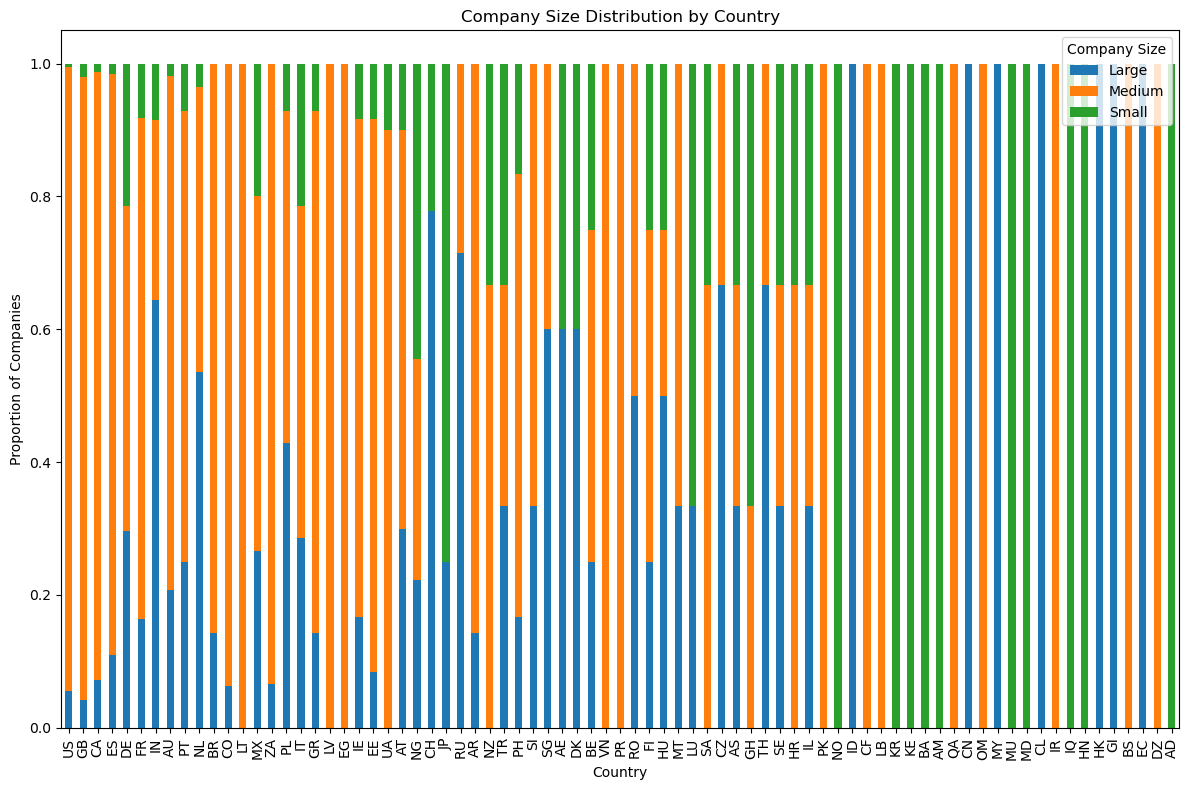

In [16]:
# Plot the Data
fig, ax = plt.subplots(figsize=(12, 8))

groupedcountries_data[['Large', 'Medium', 'Small']].plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Company Size Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Proportion of Companies')
ax.legend(title='Company Size')

plt.tight_layout()
plt.savefig('Figures/EugenioFig3.png', bbox_inches='tight')
plt.show()

In order to find if there was a relationship between company size and country of origin, we first had to create a dataframe that grouped the data by company location, company size and count the number of companies in each category. After calculating the proportion each company (small, medium or large) had in each country, we proceeded to graph the information into a stacked bar plot.

This shows us the proportion of all the different sized companies in each country. We could find big countries like the United States, Great Britain and Canada have a larger number of medium companies. However, medium companies are the most present in almost every country, making it the staple and most popular kind of company size. There are some exceptions, such as France, Japan, Russia, among others, that have more than 50% in large sized companies.